In [140]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from functions import q_model, exponential_model, loss_model

In [141]:
dir_name = f"fit_models_py_raraki_2023-10-26"
event_id = 4811

# Read data

In [142]:
input_file = rf"/home/raraki/waves/projects/smap-drydown/output/{dir_name}/all_results.csv"
_df = pd.read_csv(input_file)
coord_info_file = "/home/raraki/waves/projects/smap-drydown/data/datarods/coord_info.csv"
coord_info = pd.read_csv(coord_info_file)
df = _df.merge(coord_info, on=['EASE_row_index', 'EASE_column_index'], how='left')
print(f"Number of events: {len(df)}")
df.head()

Number of events: 4827


,Unnamed: 0,EASE_row_index,EASE_column_index,event_start,event_end,time,sm,min_sm,max_sm,pet,...,exp_r_squared,exp_y_opt,q_k,q_q,q_delta_theta,q_r_squared,q_y_opt,id,latitude,longitude
0,0,67,155,2015-07-11,2015-07-20,[0 1 2 3 4 5 6 8 9],[0.25349343 0.18419962 0.18633793 0.17191268 0...,0.069935,0.379554,5.213578,...,0.922357,"[0.24503032319272813, 0.20712017250569836, 0.1...",5.213578,3.814685,0.600883,0.850694,"[0.25597987398837496, 0.1789744304530374, 0.15...",64743,41.80753,-121.92946
1,1,67,155,2017-11-13,2017-11-16,[0 1 2 3],[0.27222747 0.25452507 0.23942971 0.24496319],0.069935,0.379554,0.612471,...,0.930781,"[0.27255775641689756, 0.2522813743081908, 0.24...",0.612471,5.501080,0.646894,0.850692,"[0.27022556791798025, 0.2561518521572929, 0.24...",64743,41.80753,-121.92946
2,2,67,155,2018-06-09,2018-06-13,[0 1 2 3 4],[0.25265527 0.20977327 0.15408464 0.13824703 0...,0.069935,0.379554,4.654991,...,0.986834,"[0.255300152589142, 0.20112254884612057, 0.162...",4.654991,3.601187,0.601571,0.872178,"[0.2561927443887677, 0.17693699572167304, 0.15...",64743,41.80753,-121.92946
3,3,67,155,2020-05-18,2020-05-24,[0 1 3 4 5 6],[0.33895215 0.29552037 0.19541869 0.18329698 0...,0.069935,0.379554,3.734320,...,0.991365,"[0.3436415680458171, 0.28488984441150106, 0.20...",3.734320,5.318616,0.879752,0.811270,"[0.3423229371395956, 0.22875808109858803, 0.19...",64743,41.80753,-121.92946
4,4,67,155,2020-08-06,2020-08-17,[ 0 1 3 4 5 6 7 8 9 11],[0.25158688 0.18893644 0.1276988 0.12960218 0...,0.069935,0.379554,5.058764,...,0.952669,"[0.24869425667750772, 0.1925607509215683, 0.13...",5.058764,3.410301,0.592960,0.945656,"[0.2535266813448142, 0.16866882294474575, 0.13...",64743,41.80753,-121.92946


In [143]:
df[df["q_r_squared"]>df["exp_r_squared"]]

,Unnamed: 0,EASE_row_index,EASE_column_index,event_start,event_end,time,sm,min_sm,max_sm,pet,...,exp_r_squared,exp_y_opt,q_k,q_q,q_delta_theta,q_r_squared,q_y_opt,id,latitude,longitude
5,5,67,155,2021-07-28,2021-07-31,[0 1 2 3],[0.2833905 0.17038053 0.14617011 0.1310065 ],0.069935,0.379554,4.988560,...,0.998012,"[0.2831882745600813, 0.17207366603689014, 0.14...",4.988560,3.281783,0.689868,0.999017,"[0.28353123328125335, 0.16820879943920053, 0.1...",64743,41.80753,-121.92946
9,0,67,158,2015-06-10,2015-06-21,[ 0 1 2 3 4 5 9 10 11],[0.33403865 0.168351 0.11829065 0.08387592 0...,0.026352,0.430491,6.446543,...,0.924026,"[0.3150981355459758, 0.2011184133123849, 0.132...",6.446543,3.119575,0.764650,0.954318,"[0.335377091428819, 0.13749170895067103, 0.108...",64746,41.80753,-120.80913
10,1,67,158,2015-07-22,2015-07-27,[0 1 2 3 5],[0.21274179 0.13840851 0.1221563 0.07698701 0...,0.026352,0.430491,5.751347,...,0.252069,"[0.1971832963887189, 0.15650193533965218, 0.12...",5.751347,3.758812,0.447788,0.407951,"[0.20732078063998266, 0.15211340098730483, 0.1...",64746,41.80753,-120.80913
11,2,67,158,2015-07-27,2015-07-31,[0 1 2 3 4],[0.16908035 0.07393711 0.06512108 0.0465972 0...,0.026352,0.430491,5.889515,...,0.987555,"[0.16847180902123202, 0.07872981400083309, 0.0...",5.889515,2.100003,0.352551,0.993099,"[0.16883179705639276, 0.0779303225813383, 0.05...",64746,41.80753,-120.80913
12,3,67,158,2015-10-02,2015-10-17,[ 0 1 2 3 5 6 7 8 9 10 11 13 14 15],[0.14962434 0.08775663 0.09651094 0.07051536 0...,0.026352,0.430491,3.026700,...,0.591965,"[0.12636782047716272, 0.1100231829169375, 0.09...",3.026700,2.639228,0.273537,0.707191,"[0.1368992169297409, 0.10957763226005221, 0.09...",64746,41.80753,-120.80913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,1,93,171,2015-07-21,2015-07-30,[0 1 2 4 5 6 7 8 9],[0.14155276 0.11009784 0.10633524 0.09333524 0...,0.072806,0.340862,5.790022,...,0.861059,"[0.13719256339588548, 0.11835427529274321, 0.1...",5.790022,2.669913,0.246603,0.901057,"[0.13890913104994423, 0.11734729187010706, 0.1...",89823,32.62151,-115.95435
4811,5,93,171,2017-02-28,2017-03-17,[ 0 1 2 3 4 5 6 8 9 10 11 12 13 14 16 17],[0.2242963 0.16762723 0.14321497 0.11999084 0...,0.072806,0.340862,3.660332,...,0.877829,"[0.2167714485636247, 0.17519747789300114, 0.14...",3.660332,3.255872,0.565235,0.956418,"[0.2243201720695307, 0.16229804889333546, 0.14...",89823,32.62151,-115.95435
4813,7,93,171,2018-01-10,2018-02-26,[ 0 1 2 4 5 6 7 8 9 10 12 13 14 15 16 ...,[0.19663468 0.15167356 0.13573535 0.11988748 0...,0.072806,0.340862,2.523083,...,0.328011,"[0.14193241747176194, 0.13940659003669842, 0.1...",2.523083,3.337653,0.415772,0.623705,"[0.18425567100273416, 0.16035554318943745, 0.1...",89823,32.62151,-115.95435
4819,13,93,171,2019-09-26,2019-10-25,[ 0 1 2 4 5 6 7 8 9 10 12 13 14 15 16 ...,[0.30876216 0.2143759 0.1673646 0.11673723 0...,0.072806,0.340862,3.822813,...,0.923401,"[0.3020246374540243, 0.22280769643651122, 0.17...",3.822813,3.426499,0.888374,0.934059,"[0.3109394252756066, 0.17408766679940935, 0.15...",89823,32.62151,-115.95435


In [144]:
event = df.loc[event_id]


In [145]:
# Your input string
input_string =event.sm

# Replace '\n' with ' ' (space) to ensure all numbers are separated by spaces
input_string = input_string.replace('\n', ' np.nan')

# Replace ' nan' with ' np.nan' (with a space before np.nan) to ensure it's a valid NumPy nan value
input_string = input_string.replace(' nan', ' np.nan')

# Remove the square brackets at the beginning and end of the string
input_string = input_string.strip('[]')

# Convert the modified string to a NumPy array
sm = np.array([float(value) if value != 'np.nan' else np.nan for value in input_string.split()])
sm

array([0.2242963 , 0.16762723, 0.14321497, 0.11999084, 0.11944264,
       0.11539506,        nan, 0.12216359, 0.1115393 , 0.10746047,
       0.12039719, 0.11674187, 0.10968956,        nan, 0.11447284,
       0.10754694, 0.10447612, 0.09860152])

In [146]:


# Your input string

# Remove the square brackets and split the string into individual values
values = event.time.strip('[]').split()

# Convert the values to integers and create a NumPy array
t_d = np.array([int(value) for value in values])
t_d


array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 16, 17])

In [147]:
import ast
def string_to_numpy_array(string):
    try:
        # Use ast.literal_eval to safely evaluate the string as a list
        return np.array(ast.literal_eval(string))
    except (SyntaxError, ValueError):
        return np.nan  # Return NaN if the string cannot be converted


In [148]:
n_days = (pd.to_datetime(event.event_end) - pd.to_datetime(event.event_start)).days
n_days

17

In [149]:
# Define variables 
theta = np.arange(0, 1, 0.01)
t = np.arange(0, n_days+1, 0.1)
# t_d = np.array([float(value) if value != 'np.nan' else np.nan for value in event.time.split()])
# t_h = pd.date_range(start=event.event_start, end=event.event_end, freq="H")

# Define parameters
k= event.q_k
q0 = 1
q = event.q_q
delta_theta = event.q_delta_theta
# q2 = 0.7
min_sm = event.min_sm
max_sm = event.max_sm

_exp_y_opt = np.array(ast.literal_eval(event.exp_y_opt)) # df['exp_y_opt'].apply(string_to_numpy_array)
exp_y_opt = (_exp_y_opt - min_sm)/(max_sm - min_sm)
_q_y_opt = np.array(ast.literal_eval(event.q_y_opt)) # df['q_y_opt'].apply(string_to_numpy_array)
q_y_opt = (_q_y_opt - min_sm)/(max_sm - min_sm)

exp_delta_theta = event.exp_delta_theta
theta_w = event.exp_theta_w
tau = event.exp_tau

norm_sm =  (sm-min_sm)/(max_sm-min_sm)


In [150]:
t_d

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 16, 17])

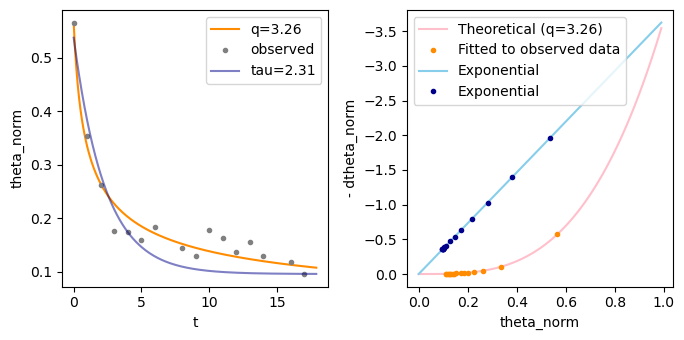

In [151]:
fig = plt.figure(figsize=(7,3.5))

# Calculate & plot the drawdown
ax1 = fig.add_subplot(1,2,1)

# Exponential decay
# ax2.plot(t, q_model(t=t, k=k), '.', label=f'q={q0}')

# Calculated drydown model
# ax2.plot(t, q_y_opt, '.', label=f'q={q1}')
ax1.plot(t, q_model(t=t, k=k, q=q, delta_theta=delta_theta), label=f'q={q:.2f}', color='darkorange')
# ax1.plot(t_d, q_y_opt,  '.', color='darkorange')
ax1.plot(t_d, norm_sm[~np.isnan(norm_sm)],  '.', color='gray', label='observed')
_exp = exponential_model(t, exp_delta_theta, theta_w, tau)
ax1.plot(t, (_exp-min_sm)/(max_sm - min_sm), label=f'tau={tau:.2f}', color='darkblue', alpha=0.5)
# ax1.plot(t_d, exp_y_opt, '.',  color='darkblue', alpha=0.5)
ax1.set_xlabel("t")
ax1.set_ylabel("theta_norm")
ax1.legend()
# ax2.set_ylim([0., 1])

# # Calculate & plot d_theta
d_theta = loss_model(theta, q, k, theta_wp=0., theta_star=1.)
d_theta_obs = loss_model(q_y_opt, q, k, theta_wp=0., theta_star=1.)
d_theta_exp = loss_model(theta, q=1, k=k, theta_wp=0., theta_star=1.)
d_theta_obs_exp = loss_model(exp_y_opt, q=1, k=k, theta_wp=0., theta_star=1.)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(theta, d_theta, label=f'Theoretical (q={q:.2f})', color='pink')
ax2.plot(q_y_opt, d_theta_obs, '.', label=f'Fitted to observed data', color='darkorange')
ax2.plot(theta, loss_model(theta, q=1, k=k), label=f'Exponential', color='skyblue')
ax2.plot(exp_y_opt, d_theta_obs_exp, '.', label=f'Exponential', color='darkblue')
ax2.set_xlabel("theta_norm")
ax2.set_ylabel("- dtheta_norm")
ax2.invert_yaxis()
ax2.legend()

fig.tight_layout()